# curve fitting 1
This will discuss some simple examples of using python libraries to fit data to a curve. The curve can be a straight line. In this case it is commonly called linear regression. It can be a higher order polynominal such as y=a0+a1*x+a2*x^2. these types are called polynominal curve fits. Last of all, the fit can be to any arbitrary function.

The first thing is to get a number of libraries or packages included in our python run.

As a reminder, all EE104 work is done using python3.

In [1]:
import numpy as np
import scipy.optimize as opt
import scipy.stats as st
import math
import matplotlib.pyplot as plt

Create an X and Y vector for 100 points of a sin wave.

This uses elaborations, and embedded for loops.


In [2]:
x = [ v/(100)*2.0*math.pi for v in range(100)]
y = [ math.sin(v) for v in x]

Plot the sin wave to make sure it feels right.
The Y should go from -1 to +1, and the x from 0 to 6+...

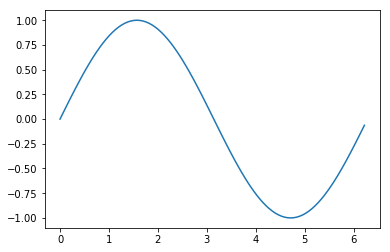

In [3]:
plt.plot(x,y)
plt.show()

First, try and fit a straight line to the curve.  There are several packages that will do this, but we will use scipy.stats.linregress

It is easy to use, and just requires an x and y list of data.

In [4]:
linfit=st.linregress(x,y)
print(linfit)
print()
print(linfit.slope)

LinregressResult(slope=-0.3038939337400324, intercept=0.9451638402111072, rvalue=-0.7794792493252418, pvalue=1.2706611131560739e-21, stderr=0.02467036812118974)

-0.3038939337400324


It provided a slope and intercept. These are members of a class, and can be accessed with the '.' notation. With these values, a plot can be made of the predicted value. Remember the shapes are not what is fit. The fit is to the data.  The day may and will typically have noise. The fit reduces the error terms as much as possible.

You can plot two lines by calling plot() twice with before show()

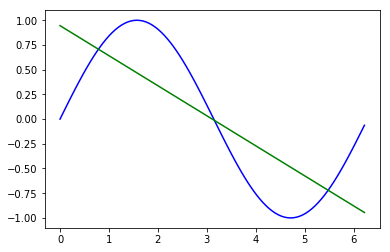

In [5]:
ypred = [ linfit.slope*xv+linfit.intercept for xv in x]
plt.plot(x,y,'b-')
plt.plot(x,ypred,'g-')
plt.show()

Just because we got an answer and the software doesn't give an error doesn't mean the fit is a 'good' one. The value R^2 indicates how well the data fits the line. An R^2 of 1 is a perfect fit, and 0 is no relationship.  Take a look at R^2:

In [6]:
linfit.rvalue **2

0.6075879001286425

It kinda fits, but isn't very useful for engineering work. 

Try a higher order polynominal.  Use the numpy.polyfit function for this. It is easy to use, and produces interesting results.

In [7]:
np.polyfit(x,y,2)

array([-0.00725784, -0.25874763,  0.89883228])

The np.poly1d() function creates a function that will predict a result from an input.

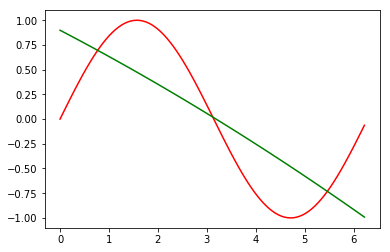

In [8]:
evres=np.poly1d(np.polyfit(x,y,2))
ypred = [ evres(v) for v in x]
plt.plot(x,y,'r')
plt.plot(x,ypred,'g')
plt.show()

A second order curve didn't do much better. the sin wave has at least two inflections, and that requires a third order equation to produce. Make a function so we can try different powers in the data

In [9]:
def pres(order):
    evres=np.poly1d(np.polyfit(x,y,order))
    ypred = [ evres(v) for v in x]
    plt.plot(x,y,'r',label="orig")
    plt.plot(x,ypred,'g',label="pred")
    plt.title("fit for order {}".format(order))
    plt.legend()
    plt.show()
    return evres

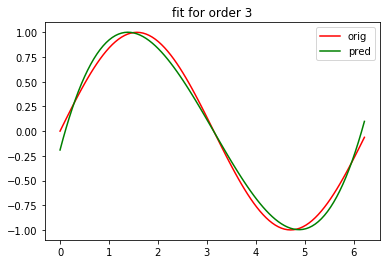

poly1d([ 0.09337992, -0.87854198,  1.89825537, -0.19109144])

In [10]:
pres(3)

Not quite what you want. Add a higher order fit. (It will become a taylors series expansion if you go to very high order).

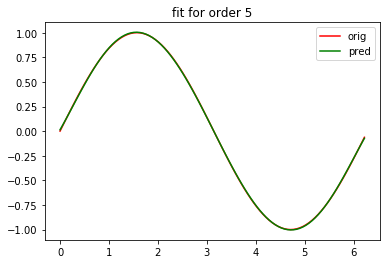

In [11]:
p5=pres(5)

5 looks like a sin wave. This could be good enough for some engineering work. But how good is it for a general predictive result.

to find out, Take a look at 11 cycles with the prediction on one cycle.


In [12]:
def toutside(f,order):
    p5=pres(order)
    xl = [v*2.0*math.pi/50.0-8*math.pi for v in range(500)]
    yl = [f(v) for v in xl]
    ypred = [p5(v) for v in xl]
    plt.ylim(-3,3)
    plt.plot(xl,yl,label="orig")
    plt.plot(xl,ypred,label="pred")
    plt.legend()
    plt.show()

The function will plot first the range 0 to 2 pi, and then the range from -pi to 4 pi.

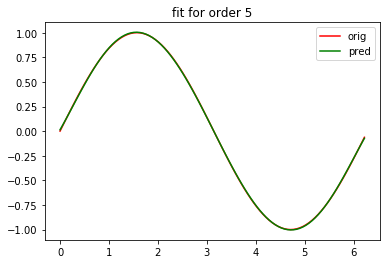

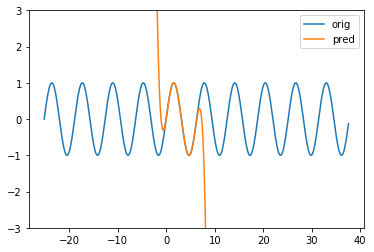

In [13]:
toutside(math.sin,5)

The resulting polynominal diverges a lot outside the fitting range. this is called 'over fitting' when the polynominal has too high a degree, and 'under fitting' when not enough data was considered. The data can be fit exactly in the range, but outside, the range it varies wildly. this is why curve fitting cannot be used to predict stock prices. (One, they are not based on any equation, and two, they are always poorly fit.)

try the fit with a higher power... At some point, it will approach the taylors expansion...

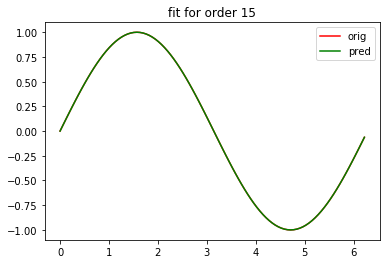

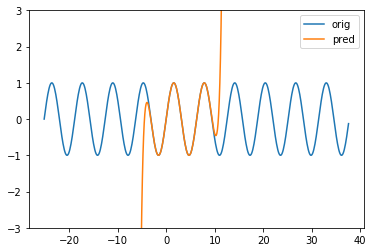

In [14]:
toutside(math.sin,15)

Looks pretty good for two cycles, and then off it goes.

Try fitting to a very high order (100) and see how it looks...

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


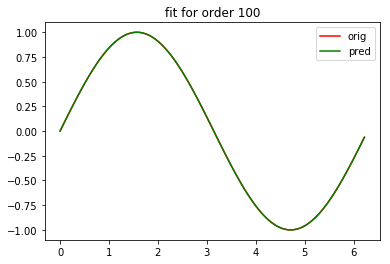

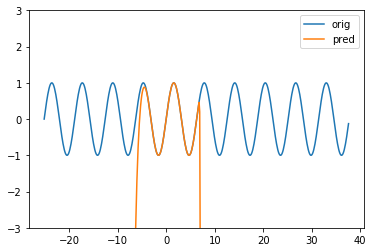

In [15]:
toutside(math.sin,100)

It got worse. The software told us there is not enough information to make a decent attempt at solving 100 power coefficients in just one sin wave.

Modify the function to include two full cycles of the sin wave, and see how that helps.

In [16]:
def cyc2(f,order):
    x = [v*2.0*math.pi/50 for v in range(100)]
    y = [f(v) for v in x]
    p5 = np.poly1d(np.polyfit(x,y,order))
    xl = [v*2.0*math.pi/50.0-8*math.pi for v in range(500)]
    yl = [f(v) for v in xl]
    ypred = [p5(v) for v in xl]
    plt.ylim(-3,3)
    plt.plot(xl,yl,label="orig")
    plt.plot(xl,ypred,label="pred")
    plt.legend()
    plt.show()

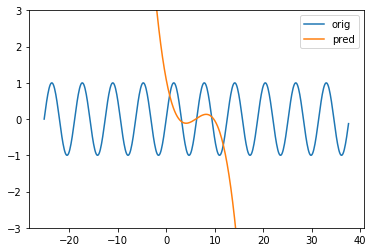

In [17]:
cyc2(math.sin,3)

2 cycles has 4 inflections, and needs at least power 5

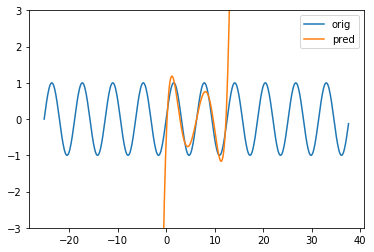

In [18]:
cyc2(math.sin,5)

Still not great, probably need about order 10 to get close...

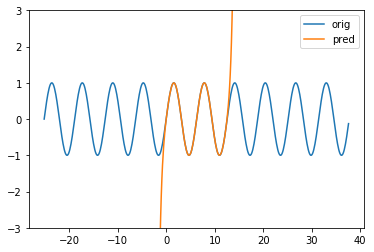

In [19]:
cyc2(math.sin,10)

Two cycles fit here, but after that, it is off to ?

Try order 50

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


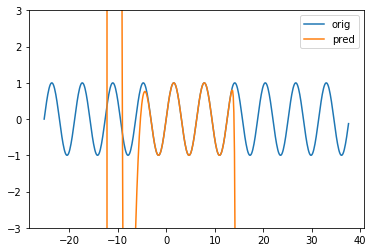

In [20]:
cyc2(math.sin,50)

It went crazy. You cannot predict a sign wave from fitting just a few cycles.  This is why we need the FFT and other sin based models.  Linear models just won't get there.

Consider a model of an expotentially dampened sin wave.  Make a function called edsin(t,df)

In [21]:
# the dampening factor is set to 0.04 for the example
def edsin(v,df=0.04):
    return math.sin(v)*math.exp(-v*df)

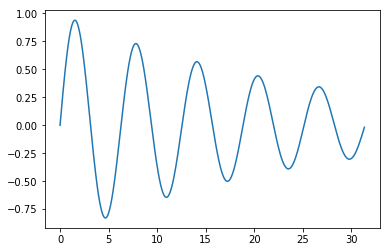

In [22]:
xe=[2.0*math.pi*v/100 for v in range(500)]
ye=[edsin(v) for v in xe]
plt.plot(xe,ye)

See how well two cycles predicts this function.

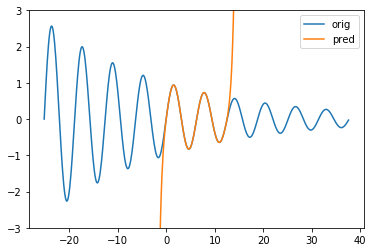

In [23]:
cyc2(edsin,10)

Once again, it fits the zone where the fitting occured, but not outside that zone.

## A simple conclusion:

Fitting can only be used in the area the original fitting data covered.